# CSE 340: Principles of programming languages
## Recitation 1
---
Attendance: https://bit.ly/2MgbHR4 or come to me to physically check attendance (Your choice)
### Anique Tahir

In [2]:
%load_ext hierarchymagic

## Outline
- Compiling programs in Linux
- Compiling and Executing code using CLI
- Check expected Input/Produced Input
- Redirecting Input/Output
- Running scripts and checking your code
- Parse Trees *
- Recursive Descent Parsers *

---
\* Includes a few exercises to get you familiar

## Compiling on Linux

You will be using Ubuntu 18.04/18.11 for this course

If you use another OS, you can download/install a VM and test your code

Recommendations:
- VirtualBox
- Vagrant (uses virtualbox)(comes with presets which make developing easier e.g. shared folders with host OS, ssh etc)
- Docker (uses jail i.e. not really virtualization)

Programming Languages: C/C++


### Installing the compilation software
In the terminal enter the following command. 

```
sudo apt install gcc g++
```

---
Note: Most versions of ubuntu come with `gcc` and `g++` already installed


### Compiling your code

The `gcc` program compiles C code while the `g++` program compiles C++ code


In [4]:
%%bash
ls

.idea
.ipynb_checkpoints
.vagrant
Makefile
README.md
Recitation1.ipynb
Recitation1.slides.html
Vagrantfile
a.out
hello.cpp
inputbuf.cc
inputbuf.h
lexer.cc
lexer.h
test1.sh
tests
ubuntu-bionic-18.04-cloudimg-console.log


In [7]:
%%bash
cat hello.cpp

//
// Created by Anique on 1/14/19.
//
#include <iostream>

using namespace std;

int main(int argc, char** args){
    cout<<"Hello!"<<endl;
    return 0;
}

In [20]:
%%bash
echo '==Compile the file into an executable=='
g++ hello.cpp -o hello.out
ls
echo '==A new file is added to the list!=='

==Compile the file into an executable==
Makefile
README.md
Untitled.ipynb
hello.cpp
hello.o
hello.out
inputbuf.cc
inputbuf.h
lexer.cc
lexer.h
test1.sh
==A new file is added to the list!==


In [18]:
%%bash
echo '==Executing the new binary=='
./hello.out

==Executing the new binary==
Hello!


### Makefile
- Makefile allows you to specify a set of commands so you don't have to do stuff over and over again

Simple Example:
```
hello.out: hello.cpp
    g++ hello.cpp -o hello.out

clean:
    rm -f *.out
```

Running:
```
make hello.out
```

Cleaning up your folder:
```
make clean
```

### Compiling Multiple Files

#### Compile
```
g++ -c file1.cpp file2.cpp file3.cpp
```

#### Link
```
g++ file1.o file2.o file3.o -o program.out
```

#### One line
```
g++ file1.cpp file2.cpp file3.cpp -o program.out
```


## Redirecting Input/Output

We can redirect input and output from the command line.

The `<` and `>` characters are used in bash to redirect IO streams

### Examples
```
./a.out < input.txt
```
Here the `input.txt` is used as an input stream rather than the Terminal

```
./a.out > output.txt
```
The output produced by `a.out` is written into output.txt rather than being displayed in the Terminal. Another useful operator is `>>` for appending instead of overwriting the file.

```
./a.out < input_data.txt > output_file.txt
```

`|` can be used to pipe input and output
```
./get_input.out | ./a.out
```


## Testing your output
There's a shell script provided to you to test your code. You might be provided with test cases

```
./test.sh
```

- Test cases are stored in the `tests` directory. The expected output and given output are matched by a diff.
- Make sure you don't output comments
- Shell scripts require execution permissions:
```
sudo chmod +x test.sh
```





## Parse Trees

### Questions?

### Example
```
S->aAb

A->ab|𝛆
```


How do you prove the Grammer is ambiguous?

*ambiguous grammers have multiple parse trees*

=> provide an example input and two different parse trees which work

#### Example:

INPUT: aabb

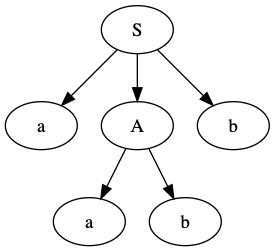

In [2]:
%%dot
digraph G {
    node1 [label="a"];
    node2 [label="b"];
    S -> a;
    S -> A;
    S -> b;
    A -> node1;
    A -> node2;
    
}

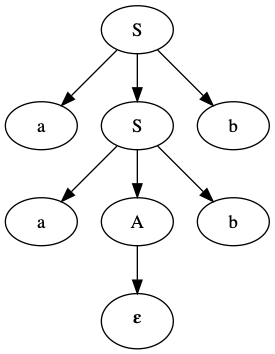

In [3]:
%%dot
digraph G {
    node1 [label="a"];
    node2 [label="b"];
    node3 [label="S", ordering=out];
    S [ordering=out];
    S -> a ;
    S -> node3;
    S -> b ;
    node3 -> node1;
    node3 -> A;
    node3 -> node2;
    A -> 𝛆;
}

### Leftmost and Rightmost derivations

Given the Grammar:
```
S -> AB

A -> abS | 𝛆

B -> abS | 𝛆
```

INPUT: `abab`

**What is the leftmost derivation?**


S -> AB -> abSB -> abABB -> ababSBB -> ababABBB -> ... -> abab 

**What is the rightmost derivation?**

S -> AB -> AabS -> AabAB -> AabAabS -> ... -> abab

## Recursive Descent Parsers

The job of the recursive descent parser is to tell whether an input is gramatically valid

Given the Grammar:
```
S -> A|B|c

A -> aS

B -> bS
```

INPUT: `ababc`

**What does getToken return?**
1. `A`?
2. `a`?
3. `{lexeme: "", token_type: a, line: 1}`

**Write the code for parseS(assume parseA, parseB, (un)getToken, etc are available)**


```
parseS(){
    token t = getToken()
    if (t.token_type=a){
        ungetToken();
        parseA();
    }else if(t.token_type=b){
        ungetToken();
        parseB();
    }else if(t.token_type=c){
        return;
    }else{
        SyntaxError();
    }
}
```

### Dry Run
INPUT: ababc

| input  | function | t         | scope  |
|--------|----------|-----------|--------|
| ^ababc | getToken |           | parseS |
| a^babc |          | {..,a,..} | parseS |
| a^babc | parseA   | {..,a,..} | parseS |
| a^babc | getToken |           | parseA |
| ab^abc |          | {..,b,..} | parseA |

Syntax Error! 
A does not start with `b`

**unget token is not called!**

# Questions?